In [1]:
import matplotlib.pyplot as plt
import pandas as pd

import re

from nltk.tokenize import word_tokenize


from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding,LSTM,Dense,GRU

from sklearn.model_selection import train_test_split

<h1>Loading Data</h1>

In [2]:
df = pd.read_csv('../datasets/toxic-comments.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [3]:
#define target variable
toxicities = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

In [4]:
toxic_comments = df.sum(numeric_only=True)
toxic_comments

toxic            15294
severe_toxic      1595
obscene           8449
threat             478
insult            7877
identity_hate     1405
dtype: int64

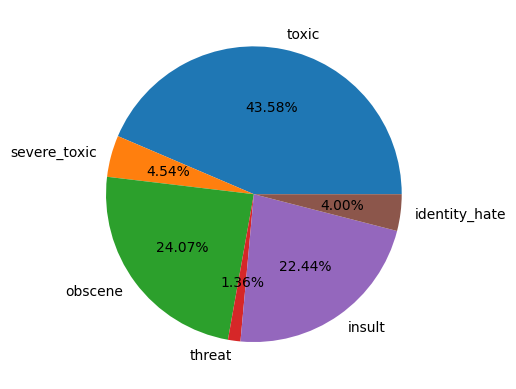

In [5]:
plt.pie(toxic_comments,
        labels=['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate'],
        autopct='%2.2f%%');

In [6]:
total = df.sum(axis=1, numeric_only=True)
neutral = sum(total == 0)
toxic = sum(total != 0)


In [7]:
neutral,toxic

(143346, 16225)

<BarContainer object of 2 artists>

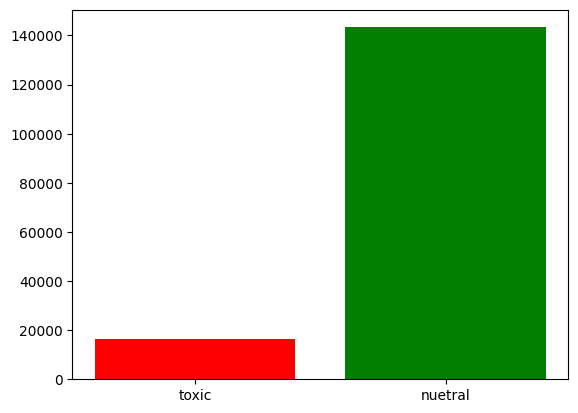

In [8]:
plt.bar(['toxic','nuetral'],  [toxic,neutral],color = ['red','green'])

In [9]:
total = df.sum(axis=1, numeric_only=True)
total


0         0
1         0
2         0
3         0
4         0
         ..
159566    0
159567    0
159568    0
159569    0
159570    0
Length: 159571, dtype: int64

<BarContainer object of 6 artists>

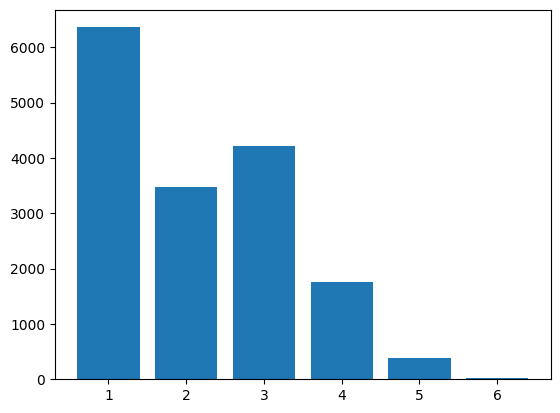

In [10]:
plt.bar(total.value_counts().index[1:],total.value_counts().values[1:])

In [11]:
total = df.sum(axis=1, numeric_only=True)
total.value_counts()[1:]

1    6360
3    4209
2    3480
4    1760
5     385
6      31
Name: count, dtype: int64

<h1>Preparing the data</h1>

In [12]:
def clear_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z0-9]+',' ',text)
    return text

In [13]:
text = 'Hello! How are you?'

clear_text(text)

'hello how are you '

In [14]:
#input_data
comment_text = df['comment_text'].apply(clear_text)
comment_text

0         explanation why the edits made under my userna...
1         d aww he matches this background colour i m se...
2         hey man i m really not trying to edit war it s...
3          more i can t make any real suggestions on imp...
4         you sir are my hero any chance you remember wh...
                                ...                        
159566     and for the second time of asking when your v...
159567    you should be ashamed of yourself that is a ho...
159568    spitzer umm theres no actual article for prost...
159569    and it looks like it was actually you who put ...
159570     and i really don t think you understand i cam...
Name: comment_text, Length: 159571, dtype: object

In [15]:
labels = df[toxicities].to_numpy()
labels

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]], shape=(159571, 6))

In [16]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(comment_text)
sequences = tokenizer.texts_to_sequences(comment_text)
padded = pad_sequences(sequences,maxlen=200,padding='post')

In [18]:
padded

array([[ 678,   77,    1, ...,    0,    0,    0],
       [ 161,   51, 2619, ...,    0,    0,    0],
       [ 407,  417,    3, ...,    0,    0,    0],
       ...,
       [  48,  732,   25, ...,    0,    0,    0],
       [   5,   10,  568, ...,    0,    0,    0],
       [   5,    3,  137, ...,    0,    0,    0]],
      shape=(159571, 200), dtype=int32)

<h1>Cross validations</h1>

In [24]:
X_train,X_test,y_train,y_test = train_test_split(padded,labels,random_state=0,test_size = 0.2)

In [25]:
X_train.shape,y_train.shape

((127656, 200), (127656, 6))

In [26]:
X_test.shape,y_test.shape

((31915, 200), (31915, 6))

<h1>Build the model</h1>

In [30]:
model = Sequential()

model.add(Embedding(5000,100))
model.add(GRU(64))
model.add(Dense(6,activation = 'sigmoid'))


In [31]:
model.summary

<bound method Model.summary of <Sequential name=sequential_2, built=False>>

In [32]:
model.compile(loss='binary_crossentropy',optimizer = 'adam',metrics = ['accuracy'])

<h1>Training the model</h1>

In [33]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs = 3)

Epoch 1/3
3990/3990 ━━━━━━━━━━━━━━━━━━━━ 414s 103ms/step - accuracy: 0.9921 - loss: 0.0817 - val_accuracy: 0.9900 - val_loss: 0.0560
Epoch 2/3
3990/3990 ━━━━━━━━━━━━━━━━━━━━ 401s 101ms/step - accuracy: 0.9933 - loss: 0.0521 - val_accuracy: 0.9935 - val_loss: 0.0519
Epoch 3/3
3990/3990 ━━━━━━━━━━━━━━━━━━━━ 410s 103ms/step - accuracy: 0.9941 - loss: 0.0480 - val_accuracy: 0.9935 - val_loss: 0.0517


In [70]:
sample_text1 = 'i will kill you next time'
sample_text2 = 'you are stupid. No one cares about your opinion. Just shut up'
sample_text3 = 'you are awesome'
sample_text4 = 'I will kill you. You stupid bitch' 

In [71]:
def predict(new_comment):
  cleaned = clear_text(new_comment)
  seq = tokenizer.texts_to_sequences([cleaned])
  new_pad = pad_sequences(seq, maxlen=200, padding='post')
  pred = model.predict(new_pad)
  return pred

In [72]:
pred_labels = []
# pred_proba is a 2D array, even for a single prediction. We need the inner array.
# pred_proba[0] contains the probabilities for each toxicity label.
for i, prob in enumerate(pred_proba[0]):
  if prob > 0.5 :
      pred_labels.append(toxicities[i])

In [73]:
pred_labels

['toxic', 'obscene', 'insult']